# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
import seaborn as sns
from keras.utils import get_file


In [ ]:

# Load the dataset
url = 'https://github.com/Leonard-Simala/Datasets/raw/refs/heads/main/pima_diabetes.csv'


dataset_path = get_file("pima-indians-diabetes.csv", url)
# Load the dataset into a pandas dataframe (no need to define columns manually)
df = pd.read_csv(dataset_path)


23873/23873 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Step 3: Check dataset info
print(df.head())
print("\nDataset Info:")
df.info()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose       

In [ ]:
#Step 4: Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Model Building and Training:

 I defines a function (build_model) to create a neural network model with customizable layers, neurons, dropout rate, and optimizer.

I  then trains multiple models with different numbers of layers and neurons, evaluating their performance using validation accuracy.

In [ ]:

# Step 5: Split the data into features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Step 6: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Step 8: Define a function to build the neural network model
def build_model(layers=1, neurons=32, dropout_rate=0.2, optimizer=None):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))

    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
        if dropout_rate:
            model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    # If no optimizer is passed, use Adam by default
    if optimizer is None:
        optimizer = Adam()

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [ ]:

# Step 9: Train and evaluate models with different number of layers and neurons
results = []
for layers in range(1, 6):
    for neurons in [32, 64, 128]:
        print(f"\nTraining model with {layers} layers and {neurons} neurons per layer...")
        model = build_model(layers=layers, neurons=neurons)

        # Early stopping to prevent overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0, callbacks=[early_stopping])

        # Evaluate the model
        val_acc = history.history['val_accuracy'][-1]
        results.append((layers, neurons, val_acc))
        print(f"Validation accuracy: {val_acc:.4f}")


Training model with 1 layers and 32 neurons per layer...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation accuracy: 0.7597

Training model with 1 layers and 64 neurons per layer...
Validation accuracy: 0.7597

Training model with 1 layers and 128 neurons per layer...
Validation accuracy: 0.7662

Training model with 2 layers and 32 neurons per layer...
Validation accuracy: 0.7468

Training model with 2 layers and 64 neurons per layer...
Validation accuracy: 0.7532

Training model with 2 layers and 128 neurons per layer...
Validation accuracy: 0.7532

Training model with 3 layers and 32 neurons per layer...
Validation accuracy: 0.7597

Training model with 3 layers and 64 neurons per layer...
Validation accuracy: 0.7532

Training model with 3 layers and 128 neurons per layer...
Validation accuracy: 0.7273

Training model with 4 layers and 32 neurons per layer...
Validation accuracy: 0.7662

Training model with 4 layers and 64 neurons per layer...
Validation accuracy: 0.7662

Training model with 4 layers and 128 neurons per layer...
Validation accuracy: 0.7208

Training model with 5

In [ ]:
# Step 10: Analyze results and identify the best model
results_df = pd.DataFrame(results, columns=['Layers', 'Neurons', 'Validation Accuracy'])
best_model_params = results_df.loc[results_df['Validation Accuracy'].idxmax()]
print("\nBest model configuration based on validation accuracy:")
print(best_model_params)


Best model configuration based on validation accuracy:
Layers                   1.000000
Neurons                128.000000
Validation Accuracy      0.766234
Name: 2, dtype: float64


In [ ]:
best_layers = int(best_model_params['Layers'])
best_neurons = int(best_model_params['Neurons'])

In [ ]:
# Step 11: Fine-tune learning rate and batch size


# Define the function to build the model with the correct optimizer
def build_model(layers=1, neurons=32, dropout_rate=0.2, optimizer=None):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))

    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
        if dropout_rate:
            model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    # If no optimizer is passed, use Adam by default
    if optimizer is None:
        optimizer = Adam(learning_rate=0.001)  # Use a default learning rate here

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Try different learning rates and batch sizes
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]

best_val_acc = 0
best_lr = None
best_batch_size = None

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f"\nTraining model with learning rate={lr}, batch size={batch_size}...")

        # Create Adam optimizer with the current learning rate
        optimizer = Adam(learning_rate=lr)

        # Build and train the model with the optimizer
        model = build_model(layers=best_layers, neurons=best_neurons, optimizer=optimizer)

        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=batch_size, verbose=0, callbacks=[early_stopping])

        # Evaluate the model
        val_acc = history.history['val_accuracy'][-1]
        print(f"Validation accuracy: {val_acc:.4f}")

        # Keep track of the best validation accuracy and corresponding hyperparameters
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_lr = lr
            best_batch_size = batch_size

print(f"\nBest learning rate: {best_lr}, Best batch size: {best_batch_size}, with validation accuracy: {best_val_acc:.4f}")




Training model with learning rate=0.001, batch size=16...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation accuracy: 0.7597

Training model with learning rate=0.001, batch size=32...
Validation accuracy: 0.7597

Training model with learning rate=0.001, batch size=64...
Validation accuracy: 0.7468

Training model with learning rate=0.01, batch size=16...
Validation accuracy: 0.7662

Training model with learning rate=0.01, batch size=32...
Validation accuracy: 0.7532

Training model with learning rate=0.01, batch size=64...
Validation accuracy: 0.7662

Training model with learning rate=0.1, batch size=16...
Validation accuracy: 0.6883

Training model with learning rate=0.1, batch size=32...
Validation accuracy: 0.7468

Training model with learning rate=0.1, batch size=64...
Validation accuracy: 0.7208

Best learning rate: 0.01, Best batch size: 16, with validation accuracy: 0.7662


In [ ]:
# Step 12: Save the best model and hyperparameters
model = build_model(layers=best_layers, neurons=best_neurons, optimizer=Adam(learning_rate=best_lr))
model.fit(X_train, y_train, epochs=100, batch_size=best_batch_size, validation_data=(X_test, y_test), verbose=0)

# Save model
model.save('best_diabetes_model.h5')

# Save hyperparameters to a text file
with open('best_hyperparameters.txt', 'w') as f:
    f.write(f"Layers: {best_layers}\n")
    f.write(f"Neurons: {best_neurons}\n")
    f.write(f"Learning Rate: {best_lr}\n")
    f.write(f"Batch Size: {best_batch_size}\n")

print("\nBest model and hyperparameters saved.")



Best model and hyperparameters saved.


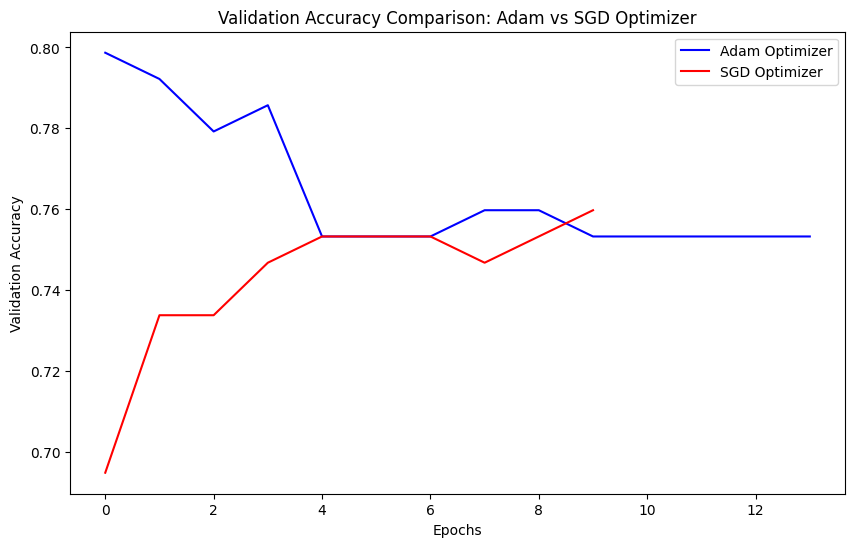

In [ ]:
# Step 13: Compare Adam optimizer with Momentum and SGD
adam_model = build_model(layers=best_layers, neurons=best_neurons, optimizer='adam')
sgd_model = build_model(layers=best_layers, neurons=best_neurons, optimizer='sgd')

# Train both models
adam_history = adam_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=best_batch_size, verbose=0, callbacks=[early_stopping])
sgd_history = sgd_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=best_batch_size, verbose=0, callbacks=[early_stopping])

# Plot validation accuracy for both optimizers
plt.figure(figsize=(10,6))
plt.plot(adam_history.history['val_accuracy'], label='Adam Optimizer', color='blue')
plt.plot(sgd_history.history['val_accuracy'], label='SGD Optimizer', color='red')
plt.title("Validation Accuracy Comparison: Adam vs SGD Optimizer")
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


###Optimizer Comparison: Adam vs. SGD:

####Convergence Speed and Stability:
Adam, an adaptive learning rate optimizer, often demonstrates faster convergence compared to SGD, particularly in problems where the loss landscape is complex and non-convex. This is due to Adam's ability to adjust the learning rate for each parameter individually based on the first and second moments of the gradients, allowing it to navigate the optimization process more efficiently. SGD typically requires manual tuning of the learning rate and may experience slower convergence, especially if the learning rate is not well-calibrated.

####Generalization and Robustness:
Adam generally achieves faster convergence, SGD offers better generalization performance when trained for longer periods with properly tuned hyperparameters. This is because SGD introduces more noise during optimization (due to its stochastic nature), which can help escape local minima and explore the parameter space more effectively. However, this noise can also lead to instability in the optimization process if not controlled.
whereas Adam's adaptive approach provides more stability but can sometimes lead to overfitting if used without proper regularization.

Adaptation to Large Datasets:
For large datasets, Adam tends to perform well- requiring fewer adjustments to the learning rate or batch size. This makes it particularly useful in scenarios where data is abundant and model training time is critical. SGD, on the other hand, might require smaller batch sizes or more iterations to achieve optimal results, which can be computationally expensive and time-consuming, but it may ultimately lead to better performance in terms of generalization if trained carefully.

Computational Efficiency:
Adam requires additional memory for storing the first and second moments of the gradients for each parameter, which can make it more computationally intensive compared to SGD, particularly when working with very large models. SGD, being a simpler algorithm, is computationally cheaper, especially when using small batches, and might be preferred in resource-constrained environments.


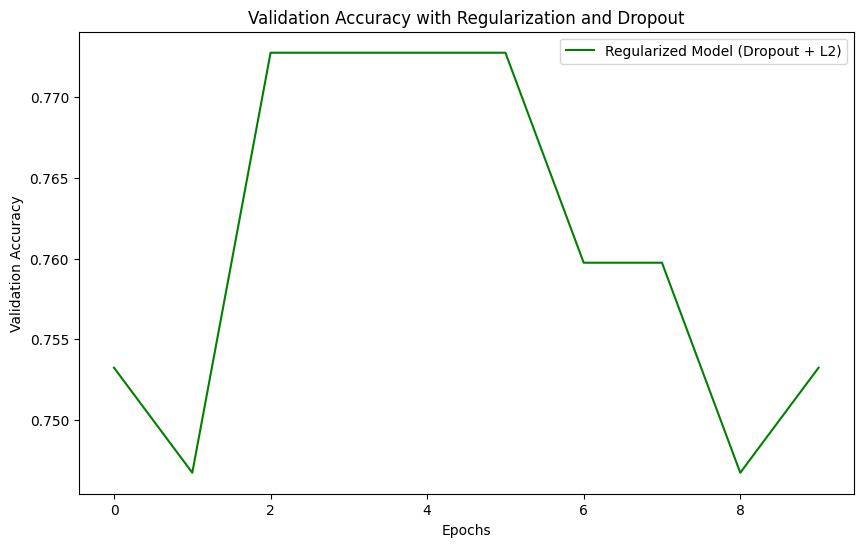

Validation accuracy of the regularized model: 0.7532


In [ ]:
# Step 14: Apply Dropout and regularization
def build_regularized_model(layers=1, neurons=32, dropout_rate=0.2, optimizer=None):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu', kernel_regularizer='l2'))

    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu', kernel_regularizer='l2'))
        if dropout_rate:
            model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    if optimizer is None:
        optimizer = Adam(learning_rate=0.001)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Train a regularized model with dropout
regularized_model = build_regularized_model(layers=best_layers, neurons=best_neurons, dropout_rate=0.3)
regularized_history = regularized_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=best_batch_size, verbose=0, callbacks=[early_stopping])

# Plot validation accuracy
plt.figure(figsize=(10,6))
plt.plot(regularized_history.history['val_accuracy'], label='Regularized Model (Dropout + L2)', color='green')
plt.title("Validation Accuracy with Regularization and Dropout")
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the regularized model
regularized_val_acc = regularized_history.history['val_accuracy'][-1]
print(f"Validation accuracy of the regularized model: {regularized_val_acc:.4f}")

##Coments

The plot displays the validation accuracy of the model over training epochs. The validation accuracy  is  can be a good indicator of how well a model generalizes to unseen data, a crucial metric in predictive modeling.
The optimization algorithm's selection can significantly influence a model's performance impacting both the final accuracy achieved and the speed at which the model converges.

By comparing two popular optimizers, Adam and SGD, the i aim to see if one results in superior validation accuracy when applied to a specific problem.

The plots reveals a considerable variation in how the model performs under each optimizer.